In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [16]:
attempts_list_2pt = []
attempts_list_3pt = []

for year in range(10,19):
    stats = pd.read_csv(f'../python_project_csv_files/20{year}-{year+1}_pbp.csv', header = [0])
    stats.fillna('',inplace=True)
    stats['Play'] = stats["VISITORDESCRIPTION"] + stats["HOMEDESCRIPTION"]
    stats['Play'] = stats['Play'].apply(lambda row: row if re.findall("\d'",row) != [] else np.nan)
    stats.dropna(subset=['Play'],inplace=True)
    stats['ShotDist'] = stats['Play'].apply(lambda row: re.findall("\d+'",row)[0][0:2] if len(re.findall("\d+'",row)[0]) == 3 else re.findall("\d+'",row)[0][0:1]).astype(int)
    stats['ShotOutcome'] = stats['Play'].apply(lambda row: 'miss' if 'MISS' in row else 'make')
    stats['ShotType'] = stats['Play'].apply(lambda row: '3PT' if '3PT' in row else '2PT')
    refined_stats = stats[['ShotType','ShotDist','ShotOutcome']]
    
    attempts_2pt = len(refined_stats[refined_stats['ShotType'] == '2PT'])
    attempts_list_2pt.append(attempts_2pt)
    attempts_3pt = len(refined_stats[refined_stats['ShotType'] == '3PT'])
    attempts_list_3pt.append(attempts_3pt)

In [17]:
attempts_list_2pt

[149685, 119517, 145798, 144798, 136619, 135216, 129584, 137567, 137593]

In [18]:
attempts_list_3pt

[36997, 30624, 41226, 45180, 46907, 51476, 58889, 60129, 66367]

In [23]:
perc_shots_2pt = []
perc_shots_3pt = []
for year in range(len(attempts_list_2pt)):
    perc_shots_2pt.append(attempts_list_2pt[year]/(attempts_list_2pt[year]+attempts_list_3pt[year]))
    perc_shots_3pt.append(attempts_list_3pt[year]/(attempts_list_2pt[year]+attempts_list_3pt[year]))

In [24]:
year_list = list(range(2010,2019))

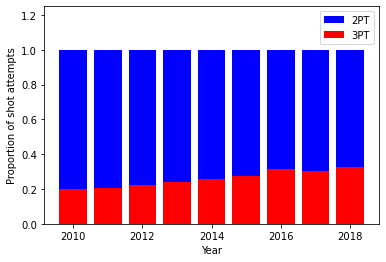

In [40]:
plt.bar(year_list,perc_shots_2pt,bottom=perc_shots_3pt,color='b',label='2PT')
plt.bar(year_list,perc_shots_3pt,color='r',label='3PT')
plt.xlabel('Year')
plt.ylabel('Proportion of shot attempts')
plt.ylim([0.0,1.25])
plt.legend()
plt.savefig('shot_attempts_by_year.png')